# **Chapter 3 회귀알고리즘과 모델 규제**

이번에는 생선의 종류를 분류하는 문제가 아니라 <u>생선의 길이와 높이를 가지고 무게를 예측</u>하는 문제를 생각해보자. 생선의 종류는 범주형 변수지만 무게는 연속변수다. 바로 이럴 때 **회귀** 알고리즘을 이용한다.

정답, 즉 target 변수가 있는 데이터로 학습하기 때문에 회귀 역시 지도학습이다.



그런데 생선의 높이?

교재 114쪽 그림을 보자. 두께도 있다.

## 03-1 k-최근접 이웃 회귀

여러가지 회귀 알고리즘이 있는데 먼저 최근접 이웃, 즉 <u>knn을 이용한 회귀</u>부터 살펴보자.


### 1) k-최근접 이웃 회귀

아이디어는 매우 단순하다.

115-116쪽 그림을 비교해보라.

<u> knn 분류 문제에서는 가장 가까운 데이터들의 범주(클래스)를 보고 다수의 범주를 선택했다. knn 회귀에서는 가장 가까운 데이터들의 값 평균을 구해서 target 값을 예측한다.</u>

### 2) 데이터 준비

영어단어 'perch'는 농어를 뜻한다. 먼저 간단하게 농어의 길이를 이용해서 무게를 예측해보자. 데이터는 모두 56개다.

In [1]:
import numpy as np

l = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
w= np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

두 변수 `perch_length, perch_weight` 모두 1차원 배열이다. 길이는 feature 변수가 되고 무게는 target 변수가 된다.

* 퀴즈 : (교재의 코드를 보지말고) 농어의 길이와 무게 데이터를 산점도로 그리는 코드를 적어보자. (표준화는 나중에 생각하자)


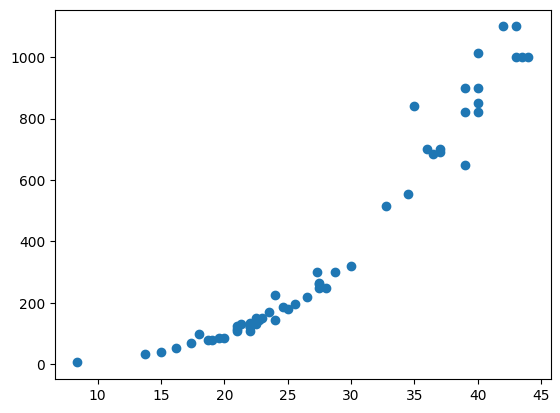

In [2]:
import matplotlib.pyplot as plt

plt.scatter(l,w)
plt.show()

* 퀴즈 : 산점도를 보고 두 변수의 관계를 설명해보자.

* 퀴즈 : 56개 데이터를 train, test 데이터(`train_input, test_input, train_target, test_target`)로 나누는 코드를 적어보자.

In [3]:
from sklearn.model_selection import train_test_split

train,test,target1,target2=train_test_split(l,w,random_state=0)

* **퀴즈 : 이번에는 `stratified`라는 옵션이 필요없다. 이유는? 회귀문제



모델을 훈련하기 전에 배열의 차원을 바꿔야한다. 사이킷런에서는 feature의 차원이 2차원이어야하는데 우리가 가진 `train_input, test_input` 배열은 1차원이기 때문이다. 배열의 차원을 바꾸는 방법은 `reshape()`을 이용하는 것이다.

In [4]:
print(train.shape,test.shape)

(42,) (14,)


간단한 배열을 가지고 잠깐 `reshape()`을 복습하자.

In [5]:
test_array = np.array([1,2,3,4])
test_array.shape

(4,)

In [6]:
test_array = test_array.reshape(2, 2)
test_array.shape

(2, 2)

In [7]:
test_array

array([[1, 2],
       [3, 4]])

데이터 갯수에 신경쓰지 말고 배열의 차원만 바꿀 때에는 `-1`을 이용하는 것이 편하다. 아래와 같이 `reshape()`의 괄호 속에 `(-1, 1)`이라고 입력하면 컬럼이 하나인 2차원 배열을 만든다. 행의 수는 자동으로 정해진다.

In [8]:
train=train.reshape(-1,1)
test=test.reshape(-1,1)

print(train.shape,test.shape)

(42, 1) (14, 1)


In [9]:
train[:5,]

array([[27.5],
       [40. ],
       [32.8],
       [19. ],
       [22. ]])

In [10]:
test[:5,]

array([[39. ],
       [27.5],
       [36.5],
       [24.6],
       [21. ]])

### 3) 결정 계수 ($ R^2$)

회귀를 위한 knn 클래스는 `neighbors` 모듈 안에 있는 `KNeighborsRegressor`다. knn 분류와 마찬가지로 객체를 만든 다음, train data를 이용해서 `fit()` 함수로 모델을 학습시키면 된다. 이어서 test data로 모델의 성능을 평가한다.

In [11]:
from sklearn.neighbors import KNeighborsRegressor

m=KNeighborsRegressor()
m.fit(train,target1)
m.score(test,target2)

0.9162089041423581

모델 평가는 역시 `score()`를 이용하는데 이때 결과는 분류처럼 정확도가 아니라 target 데이터값과 예측값 사이의 오차가 어느 정도인지 알아보는 '결정계수($ R^2 $)'다. 계산식은 121쪽에 있다.

결정계수 외에 사이킷런의 `metrics` 모듈에 있는 `mean_absolute_error`를 이용해서 모델의 성능을 평가할 수도 있다. 오차절대값의 평균이므로 작을수록 좋다.

test data로 예측하고 성능을 평가한다.

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pred = m.predict(test)

mae=mean_absolute_error(target2,pred)
mse=mean_squared_error(target2,pred)
rmse=np.sqrt(mse)

print(mae,mse,rmse)

42.27142857142858 5540.084285714287 74.43174246055433


하나의 그림 안에 train data, test data의 산점도를 함께 그려보자.

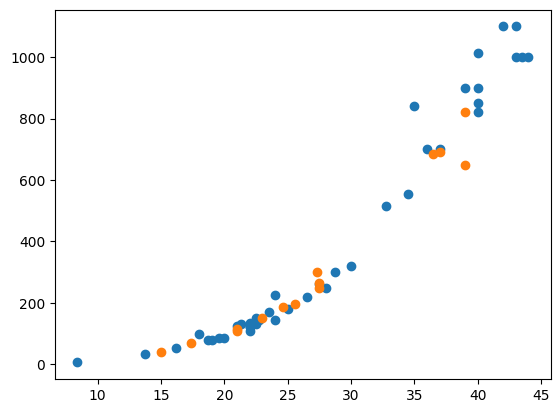

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train, target1)
plt.scatter(test, target2)
plt.show()

* 퀴즈 : 이 그림을 보고 각 test 데이터의 예측값이 어떻게 계산되었을지 설명해보라.

* 퀴즈 : 길이가 33cm인 새로운 농어가 있다고 하자. 무게를 예측해보라.

In [14]:
p33 = m.predict([[33]])
p33

array([586.])

knn 회귀의 예측과정을 알아보기 위해 길이 33cm인 농어의 이웃을 살펴보자.

* 퀴즈 : 가까운 이웃들의 번호와 이웃까지의 거리를 구하는 코드를 적어보라.

In [15]:
d, i = m.kneighbors([[33]])

print(d,i)

[[0.2 1.5 2.  3.  3. ]] [[ 2 24 35 22 31]]


In [16]:
train[i]

array([[[32.8],
        [34.5],
        [35. ],
        [36. ],
        [30. ]]])

In [17]:
train[i] - 33

array([[[-0.2],
        [ 1.5],
        [ 2. ],
        [ 3. ],
        [-3. ]]])

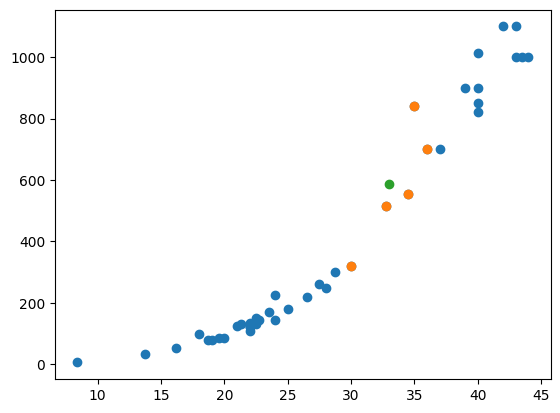

In [18]:
import matplotlib.pyplot as plt

plt.scatter(train, target1)
plt.scatter(train[i], target1[i])
plt.scatter(33, p33)
plt.show()

In [19]:
target1[i].mean()

586.0

### 4) 과대적합 vs 과소적합

이번에는 test data 대신 train data에 대해 결정계수를 구해보자.

In [20]:
m.score(train, target1)

0.9831253192289525

train data에서는 높은 성능을 보이지만 test data에서 낮은 성능을 보이는 모델은 과대적합(overfitting)되었다고 하고 그 반대의 경우는 과소적합(underfitting)되었다고 한다. 우리가 만든 knn 회귀모델의 경우 test data에서의 성능보다 train data에서의 성능이 낮으므로 과소적합 모델이라고 볼 수 있다.

과소적합을 피하는 방법 중 하나는 더 복잡한 모델을 만드는 것이다. 여기서는 knn의 k를 줄여보자.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

m=KNeighborsRegressor(n_neighbors =6)
m.fit(train, target1)
m.score(train, target1)

0.9853168650062826

In [22]:
m.score(test, target2)

0.9352540907615716

In [23]:
target2

array([650., 250., 685., 188., 115.,  40., 265., 690., 820., 300.,  70.,
       110., 197., 150.])

In [24]:
import numpy as np

x=train.reshape(-1,)
y=target1

np.corrcoef(x, y)[0,1]

0.9605225140283056

In [25]:
import numpy as np

x=test.reshape(-1,)
y=target2

np.corrcoef(x, y)[0,1]

0.9666038661571665

`k = 6`일 때 과대적합 문제가 해결되었으니 일단 좋아졌다.

## 확인문제

knn 회귀에서 최근접 이웃의 수 k를 1, 5, 10으로 바꾸어보자.

* 퀴즈

  - 아래 코드의 x에는 무엇이 들어있는가? 또 그 용도는 무엇인가?
  - `plt.plot()`은 `plt.scatter()`와 어떻게 다른가?
  - 그림을 비교해보고 모델이 어떻게 바뀌는지 설명하하라.

In [26]:
import numpy as np

x=np.arange(5, 45).reshape(-1,1)

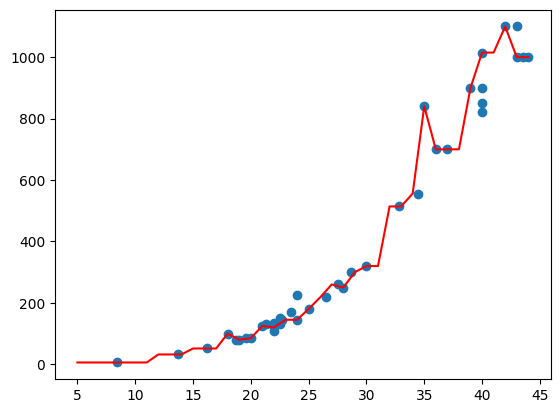

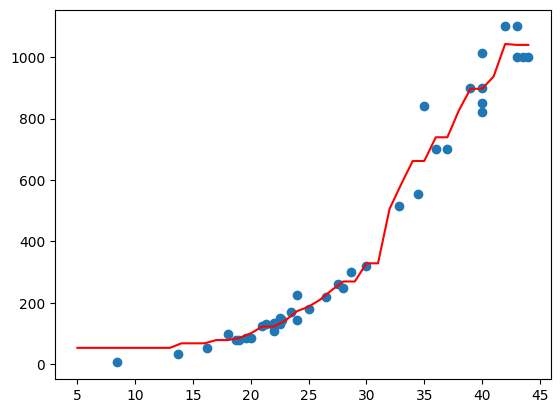

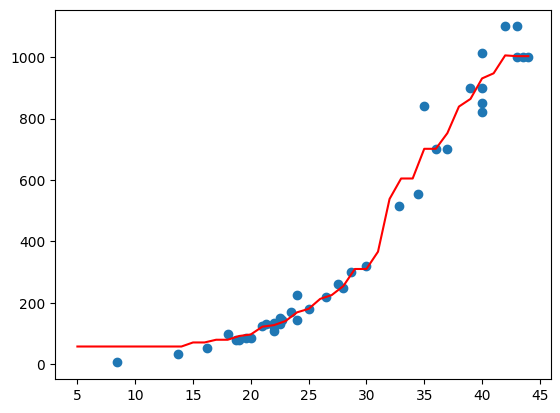

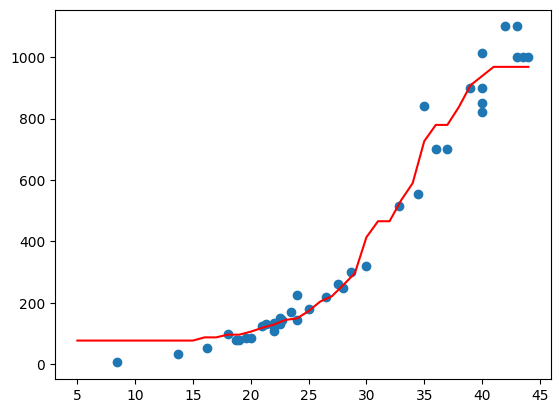

In [27]:
import matplotlib.pyplot as plt

for n in [1,5,6,10]:

    m.n_neighbors = n
    m.fit(train, target1)
    prediction = m.predict(x)

    plt.scatter(train, target1)
    plt.plot(x, prediction, c = 'r')
    plt.show()

## **03-2 선형 회귀**

### 1) k-최근접 이웃의 한계

앞에서 우리는 농어의 길이를 feature 변수로 삼고 k가 3인 knn 회귀 모델로 농어의 무게를 예측해보았다.

In [28]:
import numpy as np

l= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
w = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [29]:
from sklearn.model_selection import train_test_split

train, test, target1, target2 = train_test_split(l, w, random_state=0)

train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

m = KNeighborsRegressor(n_neighbors=3)
m.fit(train, target1)

KNeighborsRegressor(n_neighbors=3)

이 모델로 길이가 50cm인 농어의 무게를 예측해보자.

In [31]:
m.predict([[50]])

array([1000.])

산점도를 그려서 최근접 이웃 세 개를 나타내보자. 만일 농어의 길이가 50cm가 아니라 100cm라면 무게 예측값은 얼마가 될까? 여전히 같은 값1033.3이 된다.

In [32]:
m.predict([[100]])

array([1000.])

이유는? 단지 가까운 이웃 데이터의 평균값을 예측값으로 이용하는 knn의 한계때문이다.

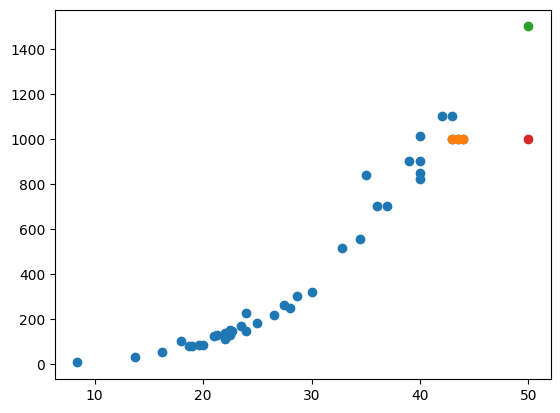

In [33]:
import matplotlib.pyplot as plt

d, i = m.kneighbors([[50]])

plt.scatter(train, target1)
plt.scatter(train[i], target1[i])

plt.scatter(50, 1500)
plt.scatter(50, 1000)
plt.show()

In [34]:
np.mean(target1[i])

1000.0

In [35]:
m.predict([[100]])

array([1000.])

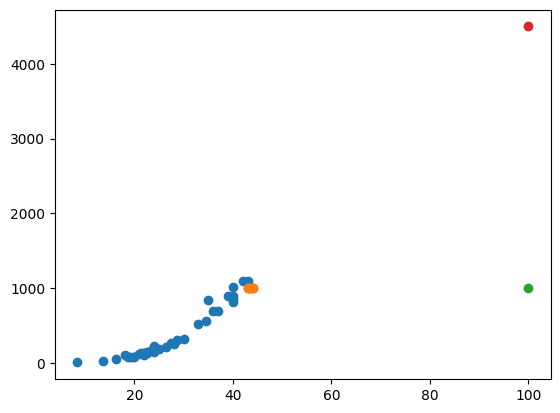

In [36]:
import matplotlib.pyplot as plt

d, i = m.kneighbors([[100]])

plt.scatter(train, target1)
plt.scatter(train[i], target1[i])

plt.scatter(100, 1000)
plt.scatter(100, 4500)
plt.show()

knn 회귀의 한계: 133쪽 아래의 설명을 읽어보자.

### 2) 선형 회귀



먼저 가장 단순한 직선모형부터 보자(단순선형회귀모델).

선형회귀를 위한 클래스 `LinearRegression`은 사이킷런의 `linear_model` 모듈 안에 있다.

In [37]:
import numpy as np

l = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
w = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [38]:
from sklearn.model_selection import train_test_split

train,test,target1,target2=train_test_split(l,w,random_state=0)

train=train.reshape(-1,1)
test=test.reshape(-1,1)

In [39]:
from sklearn.linear_model import LinearRegression

m=LinearRegression()
m.fit(train,target1)

LinearRegression()

* 퀴즈 : 추정한 회귀직선의 방정식을 적어보라. 길이가 50일 때 무게를 예측해보라.

In [40]:
m.predict([[50]])

array([1228.52162131])

추정한 직선의 기울기와 절편은 아래와 같이 확인하고 그림으로 그려볼 수 있다.

In [41]:
print(m.coef_,m.intercept_)

[37.76648694] -659.8027258214022


* 퀴즈 : 아래의 `plt.plot()`은 무엇을 그리는 코드인인가?

* 두 점이 있으면 직선을 그릴 수 있다.

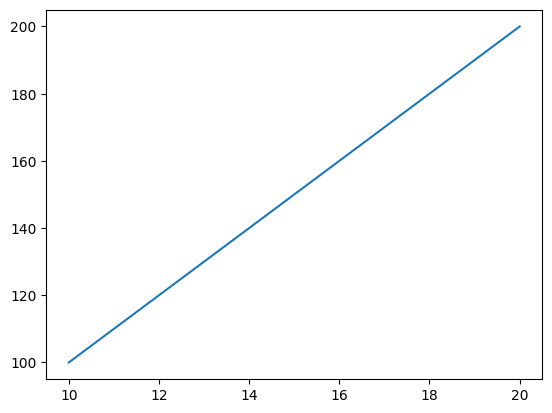

In [42]:
plt.plot([10, 20], [100, 200])

In [43]:
np.min(train)

8.4

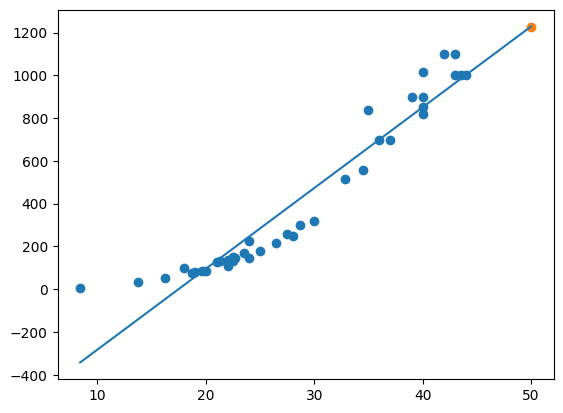

In [44]:
import matplotlib.pyplot as plt

plt.scatter(train, target1)
plt.scatter(50, 1228)

plt.plot([8.4, 50], [8.4*m.coef_+m.intercept_, 50*m.coef_+m.intercept_])
plt.show()

In [45]:
print(m.score(train, target1))
print(m.score(test, target2))

0.922603499955257
0.8803680435261592


In [46]:
import numpy as np

x=train.reshape(-1,)
y=target1

np.corrcoef(x, y)[0,1]

0.9605225140283056

In [47]:
import numpy as np

x=test.reshape(-1,)
y=target2

np.corrcoef(x, y)[0,1]

0.9666038661571665

train data, test data 모두에서 성능이 별로 좋지 않다.

무엇보다 x축의 길이가 15에서 20 사이의 값일 때 y축의의 예측값을 보라. 나와서는 안될 값이 생겼다.

이유는? 139쪽 설명을 보자.

### 3) 다항 회귀

위의 직선회귀 모델을 개선할 수 있는 방법 중 하나는 직선이 아닌 2차 함수 곡선 모델을 만드는 것이다. 139쪽 그림을 보라. 우리가 만들려고 하는 회귀식은 다음과 같다.

$ y = a x^2 + b x + c $.

$x$는 농어의 길이를 나타내고 $y$는 무게를 나타낸낸다. 즉 길이의 2차식으로 무게를 예측하고 싶다.

훈련데이터와 테스트데이터의 앞쪽에 제곱항을 각각 덧붙여보자.

`train_input`은 42개 값이 들어있는 2차원 배열이고 `test_input`은 14개 값으로 이루어진 2차원 배열이이다. 아래와 같이 넘파이의 `column_stack()`을 이용해서 간단히 2차항을 train data 세트와 test data 세트에 추가할 수 있다(뒤가 아니라 앞에 추가).

In [48]:
import numpy as np

train2=np.column_stack((train**2,train))
test2=np.column_stack((test**2,test))

새로 만든 `train_poly, test_poly`는 각각 컬럼이 두 개인 2차원 배열이 되었다.

In [49]:
print(train2.shape, test2.shape)

(42, 2) (14, 2)


In [50]:
train2[:5]

array([[ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 361.  ,   19.  ],
       [ 484.  ,   22.  ]])

* 퀴즈 : 다항 회귀를 위해 target 데이터도 feature처럼 2차항을 포함하도록 바꿔야할까? x

`train_poly`를 가지고 `train_target`을 예측하는 회귀모델을 만들자.

In [51]:
from sklearn.linear_model import LinearRegression

m=LinearRegression()
m.fit(train2,target1)

m.predict([[50**2, 50]])

array([1569.60036007])

In [52]:
print(m.coef_,m.intercept_)

[  0.99334411 -20.28904844] 100.6925153656606


In [53]:
co=m.coef_
int=m.intercept_

직선회귀로 예측했을 때와 어떻게 다른가? 산점도를 그려서 확인해보자.

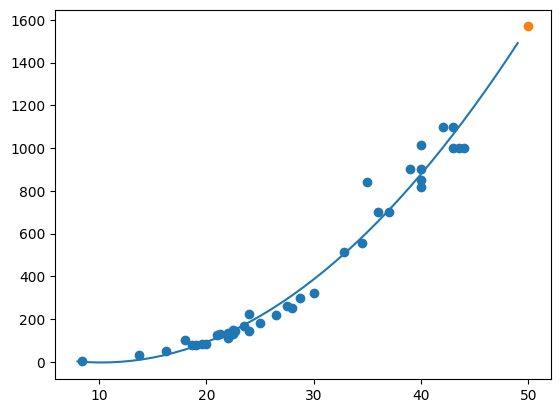

In [54]:
import matplotlib.pyplot as plt

p = np.arange(8, 50)
plt.plot(p, co[0]*p**2 +co[1]*p + int)

plt.scatter(train, target1)
plt.scatter(50, 1569)

plt.show()

In [55]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pred = m.predict(train2)

mae=mean_absolute_error(target1,pred)
mse=mean_squared_error(target1,pred)
rmse=np.sqrt(mse)

print(m.score(train2, target1)) #결정계수
print(np.corrcoef(target1, pred)[0,1]) #상관계수
print(mae,mse,rmse) #평가지표

0.9734828103169649
0.9866523249437792
39.42251395181397 3571.105100857446 59.758724056471


In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pred = m.predict(test2)

mae=mean_absolute_error(target2,pred)
mse=mean_squared_error(target2,pred)
rmse=np.sqrt(mse)


print(m.score(test2, target2)) #결정계수
print(np.corrcoef(target2, pred)[0,1]) #상관계수
print(mae,mse,rmse) #평가지표

0.9624346725637875
0.9880096963384244
27.42882153333564 2483.7374196734845 49.837108861504845


좋아졌다. 다음 절에서 좀더 복잡한 모델을 만들어서 성능을 더 높여보자.

그 전에 142-143쪽을 보고 복습하자.

148- 149쪽, <마무리>를 읽고 확인문제도 풀어보자.

## 03-3 특성 공학과 규제


### 1) 다중 회귀

농어의 무게를 예측하기 위한 feature 변수로 길이 뿐 아니라 높이와 같은 다른 특성도 이용해보자. 길이와 높이(농어의 높이?) 두 변수의 1차 모형이라면

$ 무게 = a \times 길이 + b \times 높이 + c $

가 된다.

 2차 모형이라면 여기에 길이의 제곱, 높이의 제곱, 그리고 길이와 높이를 곱한 항이 추가된다.

$ 무게 = a \times 길이^2 + b \times 높이^2 + c \times 길이 \cdot 높이 + d \times 길이 + e \times 높이 + f . $

이렇게 기존 특성을 가지고 새로운 특성을 만드는 과정은 소위 "특성공학(feature engineering)"의 하나다.

### 2) 데이터 준비

그런데 특성 변수가 여럿일 때 제곱항들, 그리고 서로 곱한 항들을 일일이 만드는 것은 번거롭다. 판다스를 이용해서 간편하게 만들어보자.

먼저 판다스의 `read_csv()` 함수를 이용하여 웹에서 csv 파일로 된 데이터를 읽는 연습을 하자. (`bit.ly`는 URL 단축서비스 링크다. 아래에 있는 `https://bit.ly/perch_csv_data`의 전체 주소를 보려면 브라우저 주소창에서 `https://bit.ly/perch_csv_data`를 입력하면 된다.

고차항을 만들기 위한 Polynomialfeatures, 그리고 선형회귀모델을 훈련하기 위한 LinearRegression에는 넘파이 배열을 입력해야한다.

Pandas dataframe은 `to_numpy()` 함수를 이용해서 간단히 넘파이 배열로 바꿀 수 있다. 바꾸면 2차원 배열이 생기는데 데이터프레임에 있던 변수명은 사라진다.

In [68]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
data=df.to_numpy()
data[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

target으로 이용할 농어 무게 데이터는 그대로다.

In [70]:
import numpy as np

w = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

feature data(농어의 length, height, width)가 들어있는 `perch_full` 배열과 target data(농어의 weight)가 들어있는 `perch_weight` 배열을 train, test dataset으로 나누자.

In [71]:
from sklearn.model_selection import train_test_split

train, test, target1, target2 = train_test_split(data, w, random_state=0)

* 퀴즈 : 회귀모델을 훈련하고 회귀방정식을 찾으시오. 또 train, test 데이터에서 각각 결정계수를 구하시오.

In [76]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(train, target1)

print(m.score(train, target1))
print(m.score(test, target2))

0.9465527597362248
0.897663761946443


In [77]:
print(m.coef_, m.intercept_)

[-6.27867158e-02  8.47087745e+01  5.98738610e+01] -556.5487530502897


* 참고 : 변수 표준화

세 변수로 이루어진 `perch_full` 데이터를 다시 보자.

In [78]:
data[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [79]:
data.mean(axis = 0)

array([27.89285714,  7.86214286,  4.74553571])

In [82]:
data.std(axis = 0)

array([8.94075455, 2.85252752, 1.75908653])

변수 표준화가 필요해보인다.

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train)

train1 = ss.transform(train)
test1 = ss.transform(test)

train1.mean(axis = 0)
train1.std(axis = 0)

array([1., 1., 1.])

In [87]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(train1, target1)

print(m.score(train1, target1))
print(m.score(test1, target2))

0.9465527597362248
0.8976637619464427


In [88]:
print(m.coef_, m.intercept_)

[ -0.58601171 248.19424109 110.66960291] 401.795238095238


이번에는 2차항들이 포함된 다항회귀 모델을 만들어보자.

### 3) 사이킷런의 변환기

2차항들이 포함된 다항 회귀모형을 편리하게 만들기 위해 사이킷런의 `preprocessing` 모듈에 있는 `PolynomialFeatures` 클래스를 이용하자.

`poly = PolynomialFeatures()`와 같은 형식으로 객체를 만들 때 괄호 속에는 다항식의 차수를 입력한다. 아래와 같이 아무 것도 입력하지 않으면 기본값 2, 즉 2차 다항식을 만든다.

In [90]:
from sklearn.preprocessing import PolynomialFeatures

p=PolynomialFeatures()

먼저 간단한 연습부터 하자.

`PolynomialFeatures` 클래스는 `StandardScaler`처럼 훈련을 위한 `fit()`과 변환을 위한 `transform()` 메서드를 갖고 있다. 괄호 속에는 훈련-변환할 데이터를 입력하면 된다. 가령 feature가 두 개이고 값이 2와 3이라고 해보자.

In [98]:
p.fit_transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

`[2, 3]` 두 값에서 여섯 개가 나왔다. 처음 1은 절편항을 위한 것이고 마지막 세 값은 순서대로 $ 2^2, ~2 \times 3,~ 3^2 $이다. 절편항을 나타내지 않으려면 `include_bias`를 `False`로 지정하면 된다(그럼 절편항은 모델에서 사라질까? feature data에 절편항 컬럼이 없어도 회귀모델에서는 자동으로 절편항을 포함시킨다).

이제 농어 데이터 `train_input` (shape은 (42, 3))를 변환해보자.

In [112]:
from sklearn.model_selection import train_test_split

train, test, target1, target2 = train_test_split(data, w, random_state=0)

In [113]:
from sklearn.preprocessing import PolynomialFeatures

p=PolynomialFeatures()
ptrain=p.fit_transform(train)
ptrain.shape

(42, 10)

왜 변수가 9개 생겼을까? 순서대로 각각 무엇을 나타낼까?

아래와 같이 `get_feature_names_out()`을 이용해서 확인할 수 있다.

In [114]:
p.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

이어서 `transform()`을 이용해서 `test_input` 데이터도 변환하자.

**(주의사항)** : test set은 `fit()`으로 다시 훈련하지 말 것.

In [115]:
ptest = p.transform(test)
ptest.shape

(14, 10)

### 4) 다중 회귀 모델 훈련하기

데이터가 준비되었으므로 선형회귀 모델을 훈련하고 score를 알아보자.

In [118]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(ptrain, target1)
print(m.score(ptrain, target1))
print(m.score(ptest, target2))

0.9930481471109651
0.951536988440775


과소적합 문제가 해결된 것 같다.

여기서 차수를 더 높이면 모델의 성능이 더 좋아질까? 5차항 모델을 만들어보자.

In [125]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=5)
ptrain=p.fit_transform(train)
ptest =p.transform(test)

print(ptrain.shape)
print(ptest.shape)

(42, 56)
(14, 56)


데이터는 42개인데 특성 변수는 무려 55개다. 아마 훈련데이터는 사실상 완벽히 설명할 수 있을 것이다.

In [126]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(ptrain, target1)

print(m.score(ptrain, target1))
print(m.score(ptest, target2))

0.9999999999999997
-185.16146682179314


하지만 테스트 데이터에서는 어처구니 없는 결과가 나온다. 이유는?

과대적합때문. 특성 수가 많다고 무조건 좋은 것은 절대 아니다.

모델을 훈련할 때 과대적합을 막기 위해 널리 쓰이는 것이 다음에 공부할 "규제(regularization)"다.

### 5) 규제

In [127]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=5)
ptrain=p.fit_transform(train)
ptest =p.transform(test)

print(ptrain.shape)
print(ptest.shape)

(42, 56)
(14, 56)


먼저 표준화부터 하자(이유 설명은 159쪽 참조).

In [128]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
strain=ss.fit_transform(ptrain)
stest = ss.transform(ptest)

교재에서는 회귀 모델을 규제하는 방법 두 가지를 소개하는데 둘 다 변수들의 회귀계수를 축소하는 방법이다. (조금 더 상세한 설명은 [사이킷런 설명서](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) 참조).



* 참고 : 규제의 강도를 결정하는 하이퍼파라미터:

릿지와 랏소 회귀에서는 (회귀 계수를 더 작게 만들어서) 규제를 강하게 할 수도 있고 반대로 약하게 규제할 수도 있다. 규제의 정도는 $\alpha$라는 하이퍼파라미터(hyperparameter, 머신러닝이 학습할 수 없고 사용자가 지정해줘야하는 파라미터)가 결정한다.

<u>$\alpha$가 크면 규제가 강해지고 $\alpha$가 0이면 규제가 없는 선형회귀가 된다.</u>

### 6) 릿지

아래와 같이 리지나 라쏘에서 $\alpha$를 지정하지 않으면 기본값 1.0이 사용된다.

In [130]:
from sklearn.linear_model import Ridge

r=Ridge()
r.fit(strain,target1)

print(r.score(strain,target1))
print(r.score(stest,target2))

0.992306040831015
0.9581890959718548


규제가 없는 회귀에 비해 아주 좋아졌다.

$\alpha$를 여러 가지 값으로 바꿔서 리지 회귀 모델을 만들어 비교해보자.

In [142]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [143]:
a = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for i in a:

    r = Ridge(alpha=i)
    r.fit(strain, target1)
    train_score.append(r.score(strain, target1))
    test_score.append(r.score(stest, target2))

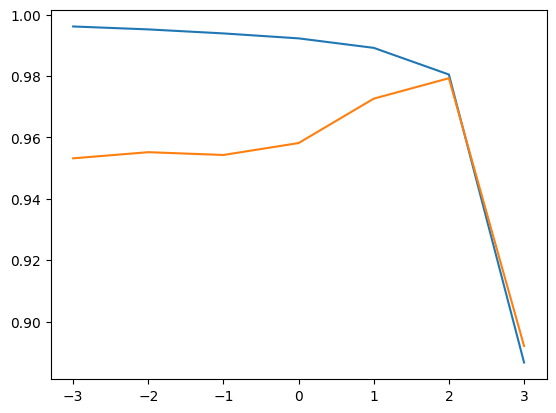

In [144]:
plt.plot(np.log10(a), train_score)
plt.plot(np.log10(a), test_score)
plt.show()

train, test 데이터에서의 score를 나타낸 그림을 보면 $\alpha = 10^{2}$일 때 가장 성능이 좋다. 그 값으로 최종 모델을 훈련하자.

In [145]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=100)
r.fit(strain, target1)

print(r.score(strain, target1))
print(r.score(stest, target2))

0.9805224270566846
0.9793175652834197


In [149]:
print(r.coef_)
print(r.intercept_)

[0.         8.94077883 9.31622603 8.34057417 8.20399974 8.49501161
 7.79099886 8.73730031 8.04797124 7.34751077 7.2860504  7.55517635
 6.92835465 7.81121572 7.18745134 6.57066533 8.05164774 7.4312757
 6.81442278 6.21645727 6.33122707 6.59619969 5.98940051 6.86169065
 6.25395589 5.66104408 7.12458829 6.51739248 5.92171639 5.34974313
 7.38134426 6.77568946 6.17796375 5.6015792  5.0573623  5.39560712
 5.65961373 5.04973988 5.93082391 5.31711921 4.72319997 6.20655083
 5.59116289 4.9925308  4.42156815 6.48368524 5.86855652 5.26678688
 4.69047286 4.14934971 6.75871839 6.14543015 5.54180203 4.96112007
 4.4142567  3.90947477]
401.7952380952381


### 7) 라쏘

In [150]:
from sklearn.linear_model import Lasso

la = Lasso()
la.fit(strain, target1)

print(la.score(strain, target1))
print(la.score(stest, target2))

0.9914530444730435
0.9590260916702629


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+03, tolerance: 5.656e+02
  model = cd_fast.enet_coordinate_descent(


역시 여러 $\alpha$ 값에서 성능을 비교해보자.(교재 164쪽 설명에서 보듯 경고는 무시해도 좋다).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+04, tolerance: 5.656e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+04, tolerance: 5.656e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.979e+03, tolerance: 5.656e

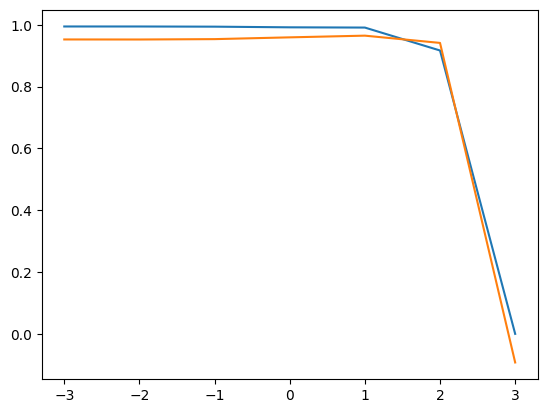

In [151]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

a = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for i in a:
    la = Lasso(alpha=i)
    la.fit(strain, target1)
    train_score.append(la.score(strain, target1))
    test_score.append(la.score(stest, target2))

plt.plot(np.log10(a), train_score)
plt.plot(np.log10(a), test_score)
plt.show()

경고가 생기는데? 164쪽 설명 참조.

그림을 보면 가로축(로그 스케일) 값이 1일 때 즉 $\alpha = 10^1$일 때 가장 성능이 좋다.

In [167]:
from sklearn.linear_model import Lasso

la = Lasso(alpha=47)
la.fit(strain, target1)

print(la.score(strain, target1))
print(la.score(stest, target2))

0.9748418644341538
0.9744510805273665


55개 변수 가운데 51개 변수의 회귀계수를 0으로 만들면서 규제한 덕분이다.

In [168]:
np.sum(la.coef_ == 0)

51